# MKA-MLF, Lab_07 Convolutional Neural Networks


## Exercise - XOR Gate


## Exercise - Hand-written digits recognition


Create CNN which will process and recognize handwritten digits. For this purposes please use the MNIST database (Modified National Institute of Standards and Technology database) which is a large database of handwritten digits that is commonly used for training various image processing systems.

### Task description


In the terms of machine learning, the Hand-written digits recognition can be threated as a multi-class classification problem. This is very important knowledge to structure our model in the correct way (Especially the output-layer, including the number of neurons and activations function and the overall loss function and classification metrics)


### 0. Import libraries


Import the all necessary libraries, you can get inspired by the previous exercises. You can improst the libraries gradually, when do you progressing with the task


In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.1 MB/s eta 0:00:00


In [ ]:
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.layers import Dense, Flatten, Input, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from keras.optimizers import SGD, Adam, RMSprop, Adagrad
from keras.regularizers import l1, l2, l1_l2
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.datasets import mnist
from keras_tuner import RandomSearch
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

### 1. Dataset


#### 1.1 Load Dataset


You can load the dataset using the following code


In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#### 1.2 Dataset examination


Using the following code, display random images,


In [ ]:
def display_random_images(x_data: np.array, y_data: np.array, count: int = 10) -> None:
  index = np.array(len(x_data))
  selected_ind = np.random.choice(index, count)

  selected_img = x_data[selected_ind]
  selected_labels = y_data[selected_ind]
  concat_img = np.concatenate(selected_img, axis=1)

  plt.figure(figsize=(20,10))
  plt.imshow(concat_img, cmap="gray")

  for id_label, label in enumerate(selected_labels):
    plt.text(14 + 28*id_label, 28*(5/4), label)
  plt.axis('off')
  plt.show()

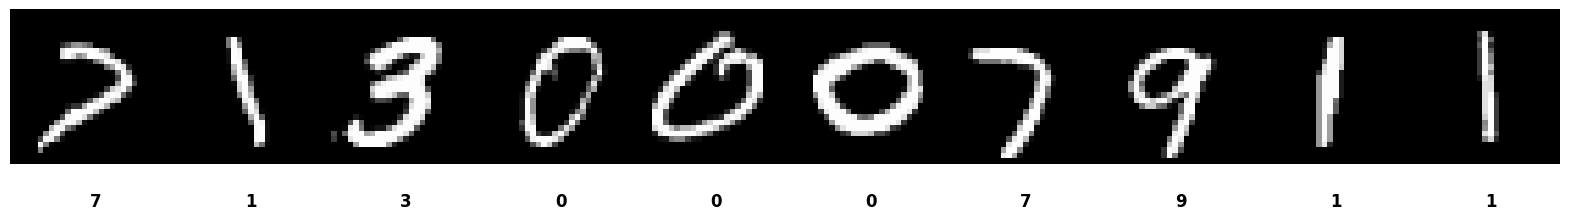

In [ ]:
display_random_images(X_train, y_train)

Examine the dataset. Answer for yourself the following questions:

- What kind of data occurs in our dataset?
- How many data samples do we have in train and test datasets?
- How many colour channels does the input variable have?
- What is the size of the input images?
- What is the necessary preprocessing of the input data X?
- How many classes do we have in target varoable?
- What is the necessary preprocessing of target variable y?


#### 1.3 Dataset preprocessing


Perform the necessary data preprocessing. The best way to preprocess the data would be one hot encoding for the target variable and normalization for the input variable (using min-max or z-score normalization)


In [ ]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
X_train.shape

(60000, 28, 28, 1)

### 2. Build the model


In this section, your task will be to define the model architecture. The intial structure can be defined as follows:

Input_layer -> Convolutional_layer(kernel_size=(3,3), no_channels=32) -> Maxpooling_layer(kernel_size=(2, 2)) -> Flatten_layer -> Dense_layer (num_classes)


#### 2.1 Define the model structure


In [ ]:
model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(10, activation='softmax')
])


#### 2.2 Compile the model


Build the model, use the relevant metrics, optimizer and loss function. While choosing the metrics and loss function, consider fact that we are are trying to solve the multiclass classification problem


Based on the web, the best optimizers: Adam = Nadam = RMSProp > Adamax > SGD > Adagrad >> Adadelta for MNIST CNN

In [ ]:
loss = 'categorical_crossentropy'
learning_rate = 0.01
optimizer = Adam(learning_rate=learning_rate)
metrics = ['accuracy']

model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=metrics
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          54,090 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 54,410 (212.54 KB)

 Trainable params: 54,410 (212.54 KB)

 Non-trainable params: 0 (0.00 B)

### 3. Training stage


#### 3.1 Model training


train your model, define the relevant hyperparameters (no. epochs, batch_size), use 20p of the training data for validation


In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)

#### 3.1 Model Evaluation on validation data


Plot the development of the training and validation loss, and training and validation metrics.


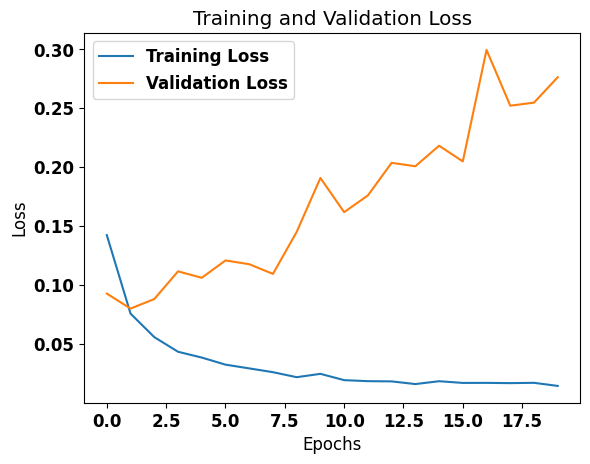

In [ ]:
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

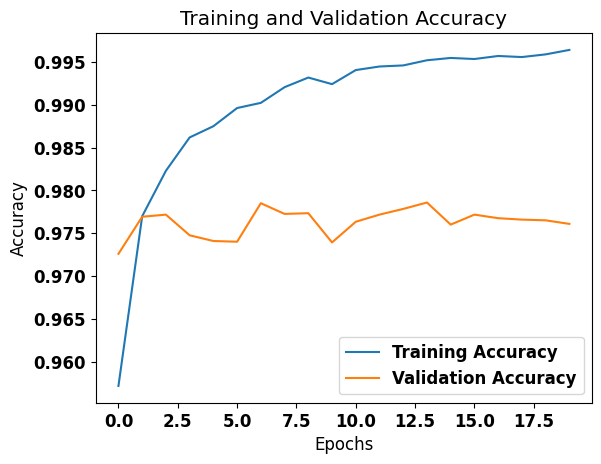

In [ ]:
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

The training and validation loss curves indicate overfitting, as the training loss keeps decreasing while the validation loss starts increasing after a few epochs. Similarly, the accuracy plot shows that training accuracy continues to improve, reaching nearly 99.5%, while validation accuracy stagnates around 97.5%, confirming that the model is not generalizing well to unseen data.

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: {score[1]*100} %')

Test loss: 0.2804065942764282
Test accuracy: 97.69999980926514 %


### 4. Model evaluation


Evaluate the model on the testing dataset using the relevant metrics. Use the confusion metrics as the one of the metrics.


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


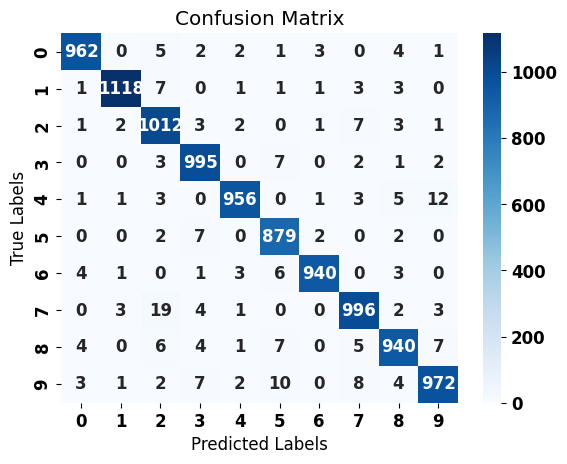

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.97      0.99      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.96      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.97      0.97      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred_classes)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

class_report = classification_report(y_true, y_pred_classes)
print("Classification Report:\n", class_report)

The model achieved 98% accuracy, demonstrating strong performance in classifying handwritten digits. The confusion matrix shows that most predictions are correct, with only minor misclassifications between visually similar digits, such as 5 and 3 or 8 and 3. The high precision, recall, and F1-score confirm that the model generalizes well. However, slight improvements could be made by data augmentation or regularization to further enhance generalization.

### 5. Hyperparameter tunning and regularization techniques


When your code is ready and fully functional, try several changes in the hyperparameters and see how they influence the testing metrics. Try changes in the network structure. You can also try adding regularization techniques such as L1, L2, and Dropout. Based on the development of training and validation loss, try to identify overfitting and avoid it


In [ ]:
## It's better not to rerun the code because of time: around 50 min

# def build_model(hp):
#     model = Sequential()

#     model.add(Input(shape=(28, 28, 1)))

#     model.add(Conv2D(
#         filters=hp.Int('filters_1', min_value=32, max_value=128, step=32),
#         kernel_size=(3, 3),
#         activation='relu'
#     ))
#     model.add(MaxPooling2D(pool_size=(2, 2)))

#     model.add(Conv2D(
#         filters=hp.Int('filters_2', min_value=32, max_value=128, step=32),
#         kernel_size=(3, 3),
#         activation='relu'
#     ))
#     model.add(MaxPooling2D(pool_size=(2, 2)))

#     model.add(Flatten())

#     model.add(Dense(
#         units=hp.Int('units', min_value=64, max_value=256, step=64),
#         activation='relu',
#         kernel_regularizer=l1_l2(
#           l1=hp.Float('l1', min_value=1e-4, max_value=1e-2, sampling='log'),
#           l2=hp.Float('l2', min_value=1e-4, max_value=1e-2, sampling='log')
#           )
#     ))

#     model.add(Dropout(rate=hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)))

#     model.add(Dense(10, activation='softmax'))

#     model.compile(
#         optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')),
#         loss='categorical_crossentropy',
#         metrics=['accuracy']
#     )

#     return model

# tuner = RandomSearch(
#     build_model,
#     objective='val_accuracy',
#     max_trials=20,
#     executions_per_trial=1,
#     directory='random_search',
#     project_name='mnist_cnn'
# )


# tuner.search(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=0)
# best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# print(f"Optimal number of filters for the first convolutional layer: {best_hps.get('filters_1')}")
# print(f"Optimal number of filters for the second convolutional layer: {best_hps.get('filters_2')}")
# print(f"Optimal number of neurons for the dense layer: {best_hps.get('units')}")
# print(f"Optimal L1 regularization rate: {best_hps.get('l1')}")
# print(f"Optimal L2 regularization rate: {best_hps.get('l2')}")
# print(f"Optimal Dropout rate: {best_hps.get('dropout_rate')}")
# print(f"Optimal learning rate: {best_hps.get('learning_rate')}")

Optimal number of filters for the first convolutional layer: 64
Optimal number of filters for the second convolutional layer: 128
Optimal number of neurons for the dense layer: 192
Optimal L1 regularization rate: 0.00010556983574454396
Optimal L2 regularization rate: 0.0007425639515658108
Optimal Dropout rate: 0.2
Optimal learning rate: 0.0002500476093354716


Results obtained with the code above:

Optimal number of filters for the first convolutional layer: 64  
Optimal number of filters for the second convolutional layer: 128  
Optimal number of neurons for the dense layer: 192  
Optimal L1 regularization rate: 0.00010556983574454396  
Optimal L2 regularization rate: 0.0007425639515658108  
Optimal Dropout rate: 0.2  
Optimal learning rate: 0.0002500476093354716  

I've tested different regularization parameters, and the best performance was achieved with a Dropout rate of 0.2 (I've also tested with 0.1 and no Dropout). Additionally, adding L1_L2 regularization only slightly reduced performance.

## Best model

In [ ]:
model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(192, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

loss = 'categorical_crossentropy'
learning_rate = 0.00025
optimizer = Adam(learning_rate=learning_rate)
metrics = ['accuracy']

model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=metrics
)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=0
)


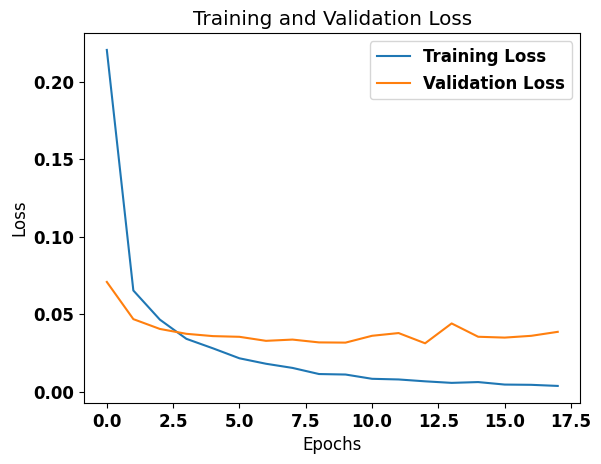

In [ ]:
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

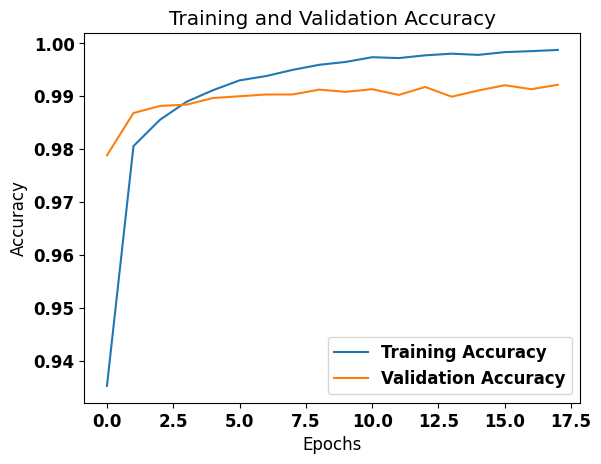

In [ ]:
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: {score[1]*100} %')

Test loss: 0.027045926079154015
Test accuracy: 99.25000071525574 %


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


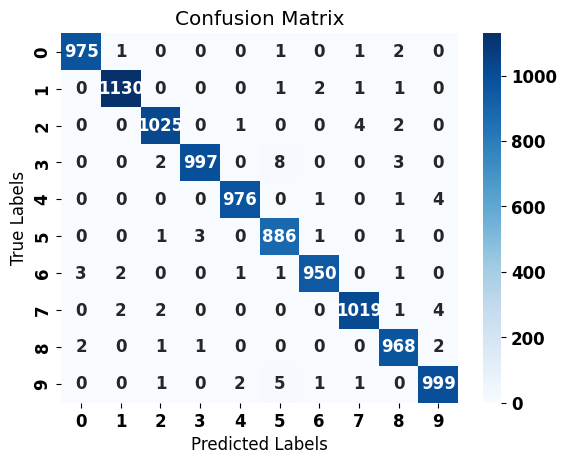

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred_classes)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

class_report = classification_report(y_true, y_pred_classes)
print("Classification Report:\n", class_report)